In [23]:
# https://datsoftlyngby.github.io/soft2021spring/DSC/week-17/#16-deep-learning-and-artificial-neural-networks

# Perceptron exercise

import numpy as np
import matplotlib.pyplot as plt

# Read the text file
data = np.loadtxt('numbers.txt')


In [9]:
# check the data
data.shape

(5, 3)

In [12]:
data

array([[0.38, 0.19, 0.  ],
       [0.17, 0.31, 0.  ],
       [0.29, 0.54, 0.  ],
       [0.89, 0.55, 1.  ],
       [0.78, 0.36, 1.  ]])

In [21]:
X, y = data[:,0:2], data[:,2:3]
X, y

(array([[0.38, 0.19],
        [0.17, 0.31],
        [0.29, 0.54],
        [0.89, 0.55],
        [0.78, 0.36]]),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.]]))

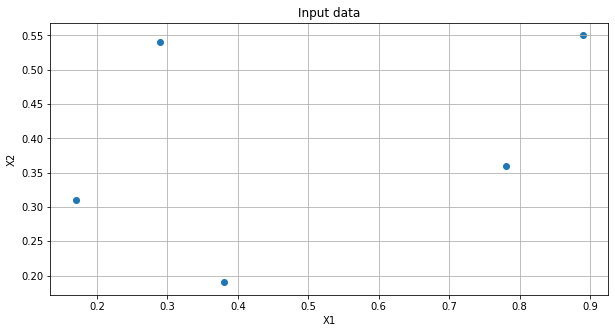

In [30]:
# Show the input numbers
plt.figure(figsize=[10,5])
plt.title("Input data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()


In [34]:
import random
w1, w2, b = random.random(), random.random(), random.random()
w1, w2, b

(0.5471189097608611, 0.38427778317358674, 0.10977804381265621)

In [46]:
y_predicted = X[0:1,0] * w1 + X[0:1,1] * w2 + b
y_predicted

array([0.39069601])

In [47]:
error = y[0] - y_predicted
error

array([-0.39069601])

In [56]:
def predict(X, W, b):
    FX = b
    for i in range(len(X)):
        FX += X[i]*W[0]

    if(FX >= 0.0):
        active = 1.0
    else:
        active = 0.0

    return active

In [58]:
W = [w1, w2]

predict(X[0], W, b)

1.0

In [ ]:
# epochs
epochs = 30 # iterations
l_rate = 0.2 # learning rate


In [60]:
# Define the training function, which will take care of correcting the errors
def train(X, y, l_rate, n_epoch):
    # initialisation
    # W = [0.0 for i in range(len(X[0]))]
    W = [random.random() for i in range(len(X[0]))]
    bias = random.random() 
    errors = []
    
    # Iterate through epochs with updated weights and bias
    for epoch in range(n_epoch):
        print('Epoch=%d' %(epoch))
        i=0
        # Loop over each row of the training data
        for row in X:
            print('\tRow=', row, 'W =', W, 'bias=', bias)
            y_predicted = predict(row, W, bias)
            
            # calculate the error as (expected - predicted)
            err = y[i] - y_predicted
            errors.append(err)
            print("\t\tExpected=%2d, Predicted=%2d, Error=%.2f" %(y[i], y_predicted, err))
            
            # Make corrections
            # update the bias
            bias += l_rate * err    
            
            # update the weights - loop over each weight in a row for updating it
            n = len(row)
            for j in range(n):
                W[j] += l_rate * err * row[j]
                
            # End of row        
            i+=1
        # End of epoch
    plot_errors(errors)
    return W

